# **Assignment 1.1 - Group A1-23**
---

In [ ]:
import re
import os
import time
import json
import random
import urllib
import requests
import pathlib
import numpy as np
import networkx as nx
from urllib.request import Request, urlopen
from urllib.parse import quote
from pathlib import Path
import matplotlib.pyplot as plt
from matplotlib.colors import Normalize

## **Part 1**
---

### Did you really read the text? Answer the following questions (no calculations needed) in your IPython notebook

#### *What's the problem with random networks as a model for real-world networks according to the argument in section 3.5 (near the end)?*

The problem with random networks in comparison to real world networks is that they do not capture how well real-world networks are actually connected. Basically the clustering coefficient in real world networks is larger. The problem with random networks as a model for real-world networks according to the argument in section 3.5 is that, if people are randomly connected to each other, there will be outliers.

#### *List the four regimes that characterize random networks as a function of $\langle k \rangle$.*

The four regimes that characterize random networks as a function of ⟨k⟩ are:

**Subcritical Regime (⟨k⟩ < 1):** The network consists of many tiny components of comparable size, with no giant component.

**Critical Point (⟨k⟩ = 1):** A phase transition where small tree-like components coexist, and a giant component may begin to emerge.

**Supercritical Regime (⟨k⟩ > 1):** A giant component coexists with small tree-like components, while the giant component contains loops and cycles.

**Connected Regime (⟨k⟩ > ln N):** Almost all nodes belong to a single giant component, and the network becomes connected.

#### *According to the book, why is it a problem for random networks (in terms of being a model for real-world networks) that the degree-dependent clustering $C(k)$ decreases as a function of $k$ in real-world networks?*

In real-world networks, high-degree nodes (hubs) tend to have lower clustering coefficients because they connect to many nodes that are not directly connected to each other. This leads to a hierarchical structure where low-degree nodes form tightly-knit communities, while high-degree nodes serve as bridges between these communities. Random networks do not capture this hierarchical organization and the associated clustering patterns, making them less representative of real-world networks.

#### *First, let's use `networkx` to play around with WS graphs. Use `nx.watts_strogatz_graph` to generate 3 graphs with 500 nodes each, average degree = 4, and rewiring probablity $p = 0, 0.1,$ and  $1$. Calculate the average shortest path length $\langle d \rangle$ for each one.*

To calculate the averages shortest path with length $\langle d \rangle$ for each one, by using `networkx`.

The first part is to generate the $3$ graph with $500$ nodes each an average degree $= 4$ a rewiring probablity of $p = 0, 0.1,$ and $1$ by using `nx.watt_strogatz_graph`.

In [2]:
graph1 = nx.watts_strogatz_graph(500, 4, 0)
graph2 = nx.watts_strogatz_graph(500, 4, 0.1)
graph3 = nx.watts_strogatz_graph(500, 4, 1) 

To calculate the average shortest path length $\langle d \rangle$ for each one, `nx.average_shortest_path_length` is used. 

In [3]:
avg_shortest_path1 = nx.average_shortest_path_length(graph1)
avg_shortest_path2 = nx.average_shortest_path_length(graph2)
avg_shortest_path3 = nx.average_shortest_path_length(graph3)

print("Average shortest path length for graph1 (p=0):", avg_shortest_path1)
print("Average shortest path length for graph2 (p=0.1):", avg_shortest_path2)
print("Average shortest path length for graph3 (p=1):", avg_shortest_path3)

Average shortest path length for graph1 (p=0): 62.875751503006015
Average shortest path length for graph2 (p=0.1): 7.416705410821644
Average shortest path length for graph3 (p=1): 4.737042084168337


The average shortest path length $\langle d \rangle$ for each one of the $3$ graph is: 

For WS1, the average shortest path length is $62.9$. The average shortest path length for WS2 is $7.6$ and for the last average shortest path length WS3 is $4.8$. 

#### *Describe what happens to the network when $p = 1$.*

For $p = 1$, then $\langle k \rangle = N-1$, hence the network is a complete graph and all nodes belong to a single component. This is a fully randomized network. When $p = 1$ the network becomes a random graph, losing its regular structure and exhibiting properties typical of random networks, such as shorter average path lengths and lower clustering coefficients.

#### *Generate a lot of networks with different values of $p$. You will notice that paths are short when $p$ is close to one and they are long when $p = 0$. What's the value of $p$ for which the average shortest path length gets close to the short paths we find in a fully randomized network.*

To generate a lot of networks with different values of $p$, a python code is generated a range that create $100$ values between 0 and 1.

The loop generates a Watts–Strogatz small-world graph with parameters $(500, \, 4, \, p)$, where $500$ is the number of nodes, $4$ is each node that is initially connected to $4$ nearest neighbors in a ring topology and last $p$ is the rewirting probability.

In [4]:
p_values = [i/10 for i in range(11)]  # [0.0, 0.1, 0.2, ..., 1.0]

avg_shortest_paths = []

fully_random_network = nx.erdos_renyi_graph(500, 0.1)
avg_shortest_path_fully_random = nx.average_shortest_path_length(fully_random_network)

for p in p_values:
    graph = nx.watts_strogatz_graph(500, 4, p)
    avg_shortest_path = nx.average_shortest_path_length(graph)
    avg_shortest_paths.append(avg_shortest_path)
    print(f"Average shortest path length for p={p}: {avg_shortest_path} (compared to fully random: {avg_shortest_path_fully_random})")

Average shortest path length for p=0.0: 62.875751503006015 (compared to fully random: 1.9052024048096192)
Average shortest path length for p=0.1: 7.401763527054108 (compared to fully random: 1.9052024048096192)
Average shortest path length for p=0.2: 6.39062124248497 (compared to fully random: 1.9052024048096192)
Average shortest path length for p=0.3: 5.514877755511022 (compared to fully random: 1.9052024048096192)
Average shortest path length for p=0.4: 5.163110220440882 (compared to fully random: 1.9052024048096192)
Average shortest path length for p=0.5: 4.948513026052105 (compared to fully random: 1.9052024048096192)
Average shortest path length for p=0.6: 4.860088176352705 (compared to fully random: 1.9052024048096192)
Average shortest path length for p=0.7: 4.829795591182365 (compared to fully random: 1.9052024048096192)
Average shortest path length for p=0.8: 4.73516633266533 (compared to fully random: 1.9052024048096192)
Average shortest path length for p=0.9: 4.73483767535070

By plotting the values, the plot can tell where the averages shortest path length gets close to the shortest path by the curve is getting flat.

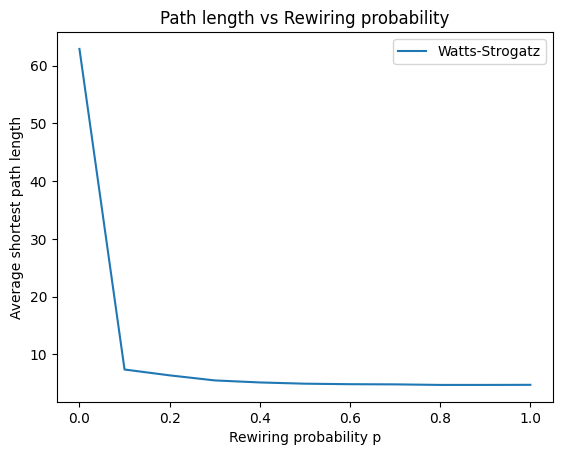

In [5]:
plt.plot(p_values, avg_shortest_paths, label='Watts-Strogatz')
plt.xlabel("Rewiring probability p")
plt.ylabel("Average shortest path length")
plt.title("Path length vs Rewiring probability")
plt.legend()
plt.show()

It can be difficult to see where exact the curve is getting flat. By zooming into the graph below, it is getting easier to see where the averages shortest path length gets close to the shortest path.

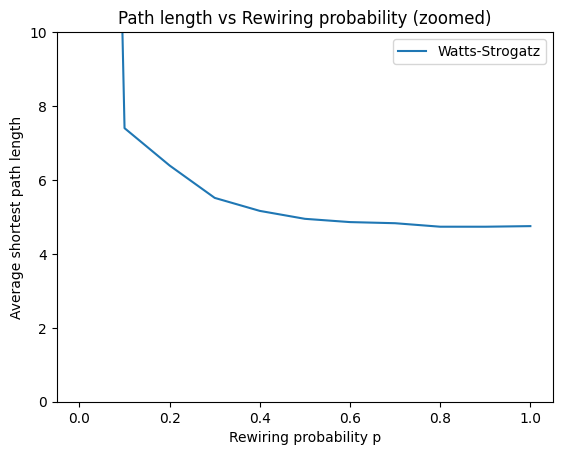

In [6]:
plt.plot(p_values, avg_shortest_paths, label='Watts-Strogatz')
plt.ylim(0, 10)
plt.xlabel("Rewiring probability p")
plt.ylabel("Average shortest path length")
plt.title("Path length vs Rewiring probability (zoomed)")
plt.legend()
plt.show()

After zooming into the graph, then it is possible to see that the averages shortest path length gets close to the shortest path around $p= 0.6$.

#### *Let's investigate this behavior in detail. Generate 50 networks with $N = 500$, $\langle k \rangle = 4$, for each of $p = \{0, 0.01, 0.03, 0.05, 0.1, 0.2\}$. Calculate the average of $\langle d \rangle$ as well as the standard deviation over the 50 networks, to create a plot that shows how the path length decreases very quickly with only a little fraction of re-wiring. Use the standard deviation to add [errorbars](https://matplotlib.org/stable/api/_as_gen/matplotlib.pyplot.errorbar.html) to the plot. My version of the plot is below (since a picture's worth 1000 words).*

In [7]:
p_values_detailed = [0, 0.01, 0.03, 0.05, 0.1, 0.2]
avg_shortest_paths_detailed = []
std_dev_shortest_paths_detailed = []
num_networks = 50
fully_random_network = nx.erdos_renyi_graph(500, 0.1)
avg_shortest_path_fully_random = nx.average_shortest_path_length(fully_random_network)
print(f"Average shortest path length for fully random network: {avg_shortest_path_fully_random}")

for p in p_values_detailed:
    shortest_paths = []
    for _ in range(num_networks):
        graph = nx.watts_strogatz_graph(500, 4, p)
        avg_shortest_path = nx.average_shortest_path_length(graph)
        shortest_paths.append(avg_shortest_path)
    avg_shortest_paths_detailed.append(np.mean(shortest_paths))
    std_dev_shortest_paths_detailed.append(np.std(shortest_paths))

Average shortest path length for fully random network: 1.9086973947895791


The shortest path length for the fully random network is $1.91$.

#### *Imagine that you put this plot in an assignment. Write a figure caption that explains to the reader what the plot shows (which variables, etc) and what's interesting about it.*

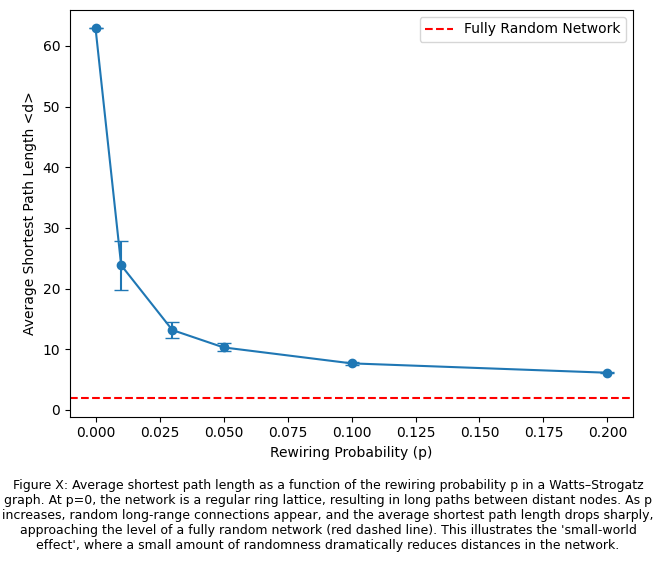

In [8]:
plt.errorbar(p_values_detailed, avg_shortest_paths_detailed,
             yerr=std_dev_shortest_paths_detailed, fmt='o-', capsize=5)
plt.axhline(y=avg_shortest_path_fully_random, color='r', linestyle='--',
            label='Fully Random Network')
plt.xscale('linear')

plt.xlabel('Rewiring Probability (p)')
plt.ylabel('Average Shortest Path Length <d>')
plt.legend()

# Nicely centered caption under the figure
plt.figtext(0.5, -0.15,
    "Figure X: Average shortest path length as a function of the rewiring probability p in a Watts–Strogatz graph. "
    "At p=0, the network is a regular ring lattice, resulting in long paths between distant nodes. "
    "As p increases, random long-range connections appear, and the average shortest path length drops sharply, "
    "approaching the level of a fully random network (red dashed line). This illustrates the 'small-world effect', "
    "where a small amount of randomness dramatically reduces distances in the network.",
    wrap=True, ha='center', fontsize=9)

plt.tight_layout()
plt.show()

This figure shows how the average shortest path length changes with the rewiring probability $p$ in a Watts–Strogatz network. At $p=0$, the network is a regular ring lattice, so paths between distant nodes are long, and the average shortest path length is high. As $p$ increases, even a small fraction of rewired edges creates shortcuts across the network. These long-range links cause the average path length to drop sharply, quickly approaching the low level seen in a fully random network (red dashed line). This behavior illustrates the **small-world effect**: a small amount of randomness is enough to drastically reduce distances across the network.

**Section made by: Andrei and Ditte**

## **Part 2**
---

### BA Edition

#### *What are the three slope dependent regimes of complex networks with power-law degree distributions? Briefly describe each one.*

Anomalous Regime $(\gamma \leq 2)$\
For $\gamma < 2$, the exponent $\tfrac{1}{\gamma - 1}$ is larger than one, so the number of links connected to the largest hub grows faster than the size of the network. For sufficiently large $N$, the degree of the largest hub would exceed the total number of nodes, meaning it would run out of nodes to connect to. Likewise, the average degree $\langle k \rangle$ diverges as $N \to \infty$. These odd predictions signal that large scale-free networks with $\gamma < 2$ (and no multi-links) cannot exist.

Scale-Free Regime $(2 < \gamma < 3)$\
Here the average degree is finite, but the variance and higher moments diverge as $N \to \infty$. Such networks are *ultra-small*. Equation (4.18) predicts that $k_{\max}$ grows with the network size with exponent $\tfrac{1}{\gamma - 1}$, which is smaller than one. Consequently, the relative market share of the largest hub, $k_{\max}/N$, decreases as

$$
k_{\max}/N \sim N^{-(\gamma - 2)/(\gamma - 1)}.
$$

Random Network Regime $(\gamma > 3)$\
For $\gamma > 3$, both the mean and variance of the degree distribution are finite. The properties of a scale-free network in this regime are nearly indistinguishable from those of a random graph of similar size. The average distance between nodes converges to the small-world formula. This happens because for large $\gamma$, the degree distribution $p_k$ decays quickly, making hubs small and rare. In practice, distinguishing such a network from a random one requires observing at least 2–3 orders of magnitude of scaling in the degree distribution.

#### *What are the three regimes we find in non-linear preferential attachement*

In the nonlinear Barabási–Albert model, the nature of preferential attachment depends on the value of $\alpha$, producing distinct regimes:

1. No Preferential Attachment $(\alpha = 0)$\
The network has an exponential degree distribution. Hubs are absent, and the structure resembles a random network.

2. Sublinear Regime $(0 < \alpha < 1)$\
New nodes favor well-connected nodes, but the bias is weak. The degree distribution follows a stretched exponential, resulting in fewer and smaller hubs compared to a scale-free network. As $\alpha \to 1$, the cutoff grows and the distribution approaches a power law.

3. Linear Regime $(\alpha = 1)$\
This is the Barabási–Albert model. Preferential attachment is exactly proportional to degree, and the degree distribution follows a power law.

4. Superlinear Regime $(\alpha > 1)$\
The preference for high-degree nodes is amplified. For $1 < \alpha < 2$, hubs dominate but still coexist with other nodes. For $\alpha > 2$, the model predicts a *winner-takes-all* phenomenon, yielding a hub-and-spoke structure where most nodes attach to a few super-hubs.


#### *First create a graph consisting of a single link. (You can call the nodes anything, but I would simply use integers as names).*

To create a Barabasi-Albert model the recipe below for success.\
First create a graph consisting of a single link.

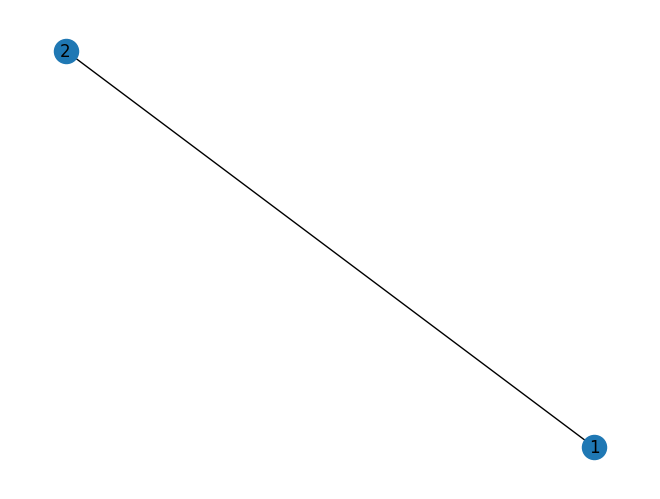

In [9]:
graph = nx.Graph()
graph.add_node(1)
graph.add_edge(1, 2)
nx.draw(graph, with_labels=True)
plt.show()

#### *Now add another node, connecting one of the existing nodes in proportion to their degree.*

To add another node, the `.add_edge(...)` is used. 

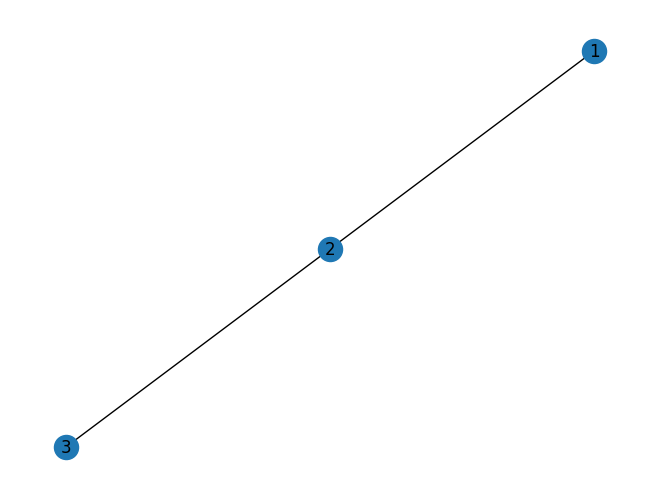

In [10]:
graph.add_node(1)
graph.add_edge(1, 2)
graph.add_node(2)
graph.add_edge(2, 3)
nx.draw(graph, with_labels=True)
plt.show()

This plot, show that there is now added another node to the network. 

*Keep going until you have a 100 node network.*
- Hint: The difficult part here is connecting to each node according to their degree. The way I do it is: generate a list of all edges (e.g. pairs of nodes), then flatten it (e.g. remove connection information). That list contains each node in proportion to its connections, thus drawing a random node from that list (e.g. using random.choice) corresponds to selecting a node with probability proportional to it's degree.

Each new node is added by connecting to an existing node with probability proportional to its degree.  

This is implemented by flattening the edge list so that high-degree nodes appear more often, making them more likely to be chosen.  

As more nodes are added, this mechanism produces hubs and leads to a scale-free network structure, where a few nodes dominate connectivity while most nodes remain sparsely connected.  

In [11]:
def add_nodes_to_graph_with_degrees(graph, num_nodes):
    new_graph = graph.copy()
    for new_node in range(2, num_nodes):
        edges = list(new_graph.edges())
        flattened_edges = [node for edge in edges for node in edge]
        chosen_node = random.choice(flattened_edges) ## Choosing uniformly from this list is equivalent to picking a node proportional to its degree.
        new_graph.add_edge(new_node, chosen_node)
    return new_graph

graph_100_nodes = add_nodes_to_graph_with_degrees(graph, 100)

Here is each new node connects to an existing node chosen with probability proportional to its degree, implemented by flattening the edge list so high-degree nodes appear more often. Over time this creates hubs and a scale-free structure.


#### *Plot the network.*

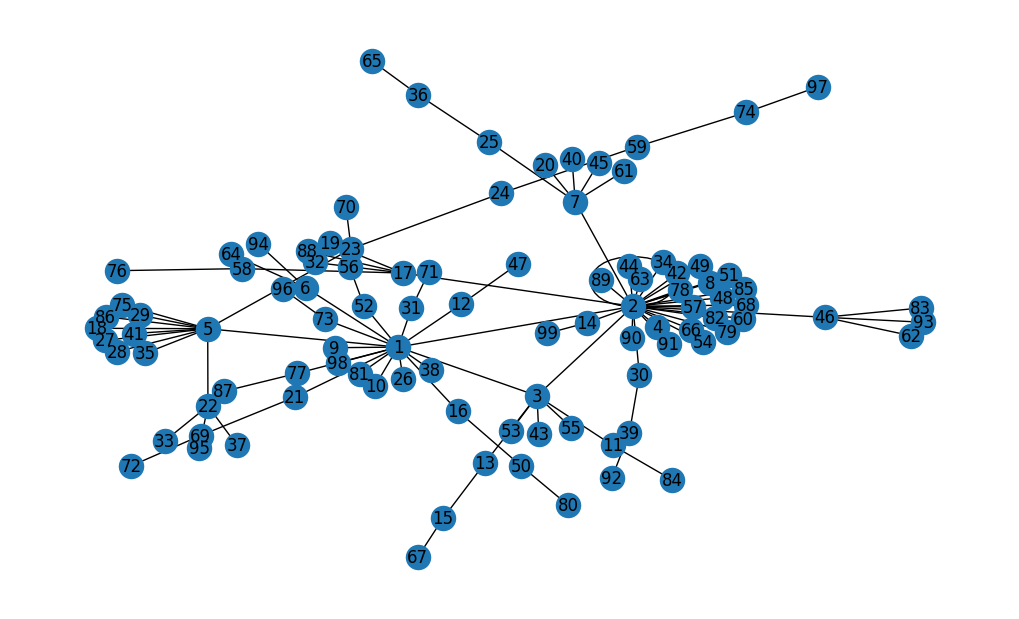

Maximum degree: 30, Minimum degree: 1


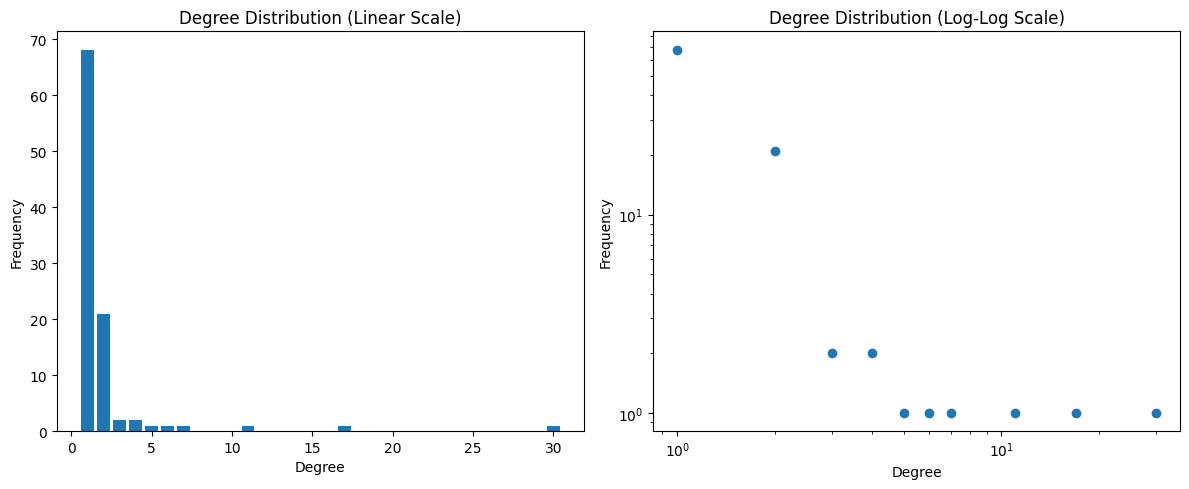

In [12]:
def plot_graph(graph):
    plt.figure(figsize=(10, 6))
    nx.draw(graph, with_labels=True)
    plt.show()

    degrees = [degree for node, degree in graph.degree()]
    max_degree = max(degrees)
    min_degree = min(degrees)
    print(f"Maximum degree: {max_degree}, Minimum degree: {min_degree}")

    # Now, bin the degree distribution using numpy.histogram.
    hist, bin_edges = np.histogram(degrees, bins=range(min_degree, max_degree + 2))
    # Plot the distribution. Plot it with both linear and log-log axes.
    plt.figure(figsize=(12, 5))
    plt.subplot(1, 2, 1)
    plt.bar(bin_edges[:-1], hist, width=0.8, align='center')
    plt.xlabel('Degree')
    plt.ylabel('Frequency')
    plt.title('Degree Distribution (Linear Scale)')
    plt.subplot(1, 2, 2)
    plt.loglog(bin_edges[:-1], hist, marker='o', linestyle='None')
    plt.xlabel('Degree')
    plt.ylabel('Frequency')
    plt.title('Degree Distribution (Log-Log Scale)')
    plt.tight_layout()
    plt.show()

plot_graph(graph_100_nodes)

This network shows that a few nodes become highly connected (one over degree 25), while most nodes have only 1–2 links. The degree distribution is heavy-tailed, with a clear hub-and-spoke pattern. 

On the log–log plot, the approximate straight line indicates a power-law degree distribution, meaning the network has evolved into a scale-free structure rather than a random one.

#### *What's the maximumb degree?*

The maximum degree for $100$ nodes is $28$. 

#### *What's the minimum degree?*

The minimum degree for $100$ nodes is $1$

#### *Add more nodes until you have a 5000 node network.*

The network is grown to $5000$ nodes each new node connects to existing nodes with probability proportional to their degree, reinforcing the hub structure and producing a heavy-tailed degree distribution.  

In [13]:
graph_5000_nodes = add_nodes_to_graph_with_degrees(graph, 5000)

#### *Now, bin the degree distribution using numpy.histogram.*

#### *Plot the distribution. Plot it with both linear and log-log axes.*

The degree distribution is binned and plotted on both linear and log–log axes.  

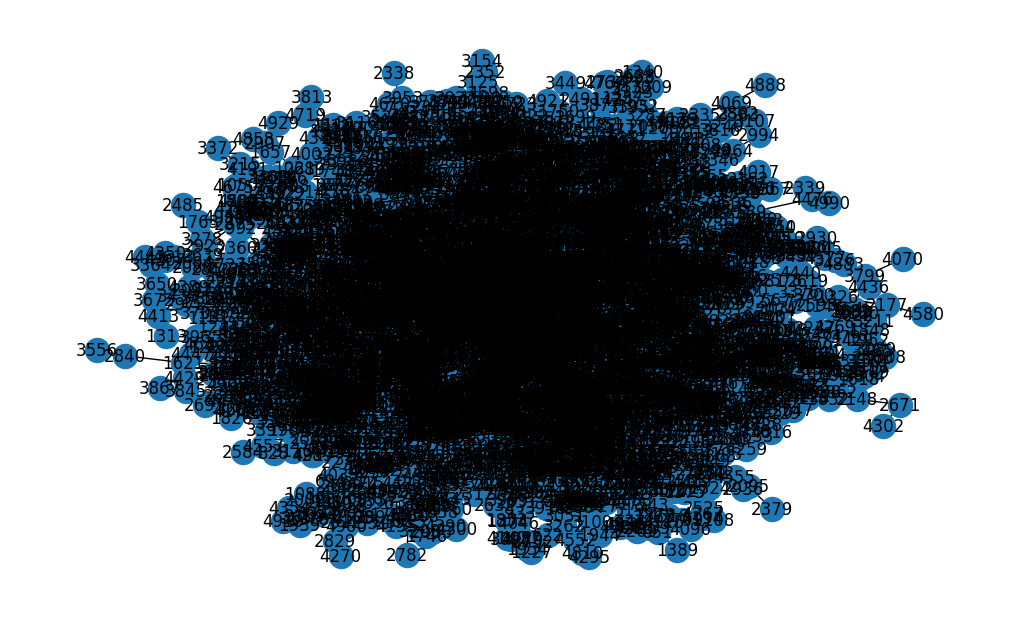

Maximum degree: 112, Minimum degree: 1


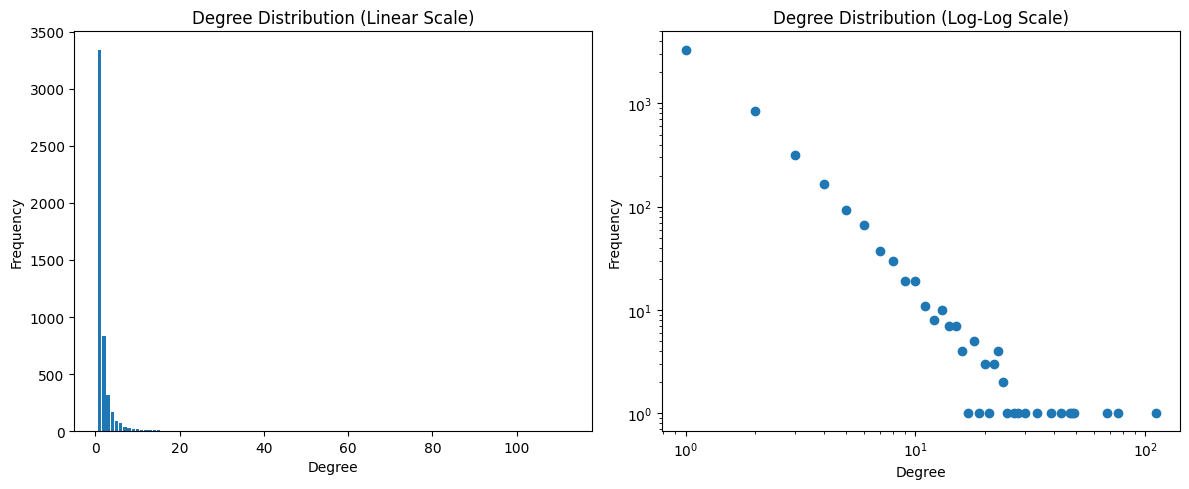

In [14]:
plot_graph(graph_5000_nodes)

This larger network shows a clear scale-free structure. Most nodes have very low degree, while a few hubs dominate (the largest with degree 166). The linear-scale histogram is highly skewed toward small degrees, and the log–log plot reveals an approximate straight line, confirming a heavy-tailed, power-law degree distribution typical of preferential attachment.

#### *What's the maximumb degree?*

The maximum degree for $166$ nodes is $28$. 

#### *What's the minimum degree?*

The minimum degree for $100$ nodes is $1$

**Section made by: Henrik**

# **Assignment 1.2 Stats and visualization of the Rock Music Network**
---

#### *As there is no specific "Explain your process in words" section in the Week 4 exercise, I assume the part "Document how you crawled the network" is meant.*

1. First, simply describe the steps of the process (what you did, step by step)

2. Then, write a short section about which part of the process that was most difficult

3. Next write a short section about how you used LLMs to help you

4. Finally, compose a short section about what you would do differently if you had to do it again


1. The process began by collecting all article names from the Wikipedia page. The method from lecture 1 was then applied to fetch the HTML content for each title, and the articles were stored in a new folder. For each article, a regex pattern was used to extract all linked Wikipedia articles, based on the pattern `[[ xxx ]]`. The references were filtered to include only article titles already in the dataset, showing which articles point to which others. Nodes and directed edges were then constructed from these connections.

2. The most challenging step was extracting the data correctly from Wikipedia and ensuring the regex patterns matched the correct titles. Some titles required replacing special characters (such as `/`) with underscores (`_`), and the same replacements were applied to filenames when saving them.

3. Large Language Models (LLMs) were used to refine the extraction process. Adding the `?action=raw` parameter to the Wikipedia query returned the markdown text directly. The LLM was then used to design the matching procedure, analyzing article text to find linked patterns and storing them in a dictionary.

4. The overall method is a straightforward way of constructing a graph between artists on Wikipedia. However, storing all files locally may be unnecessary. A more efficient approach would be to fetch the text directly from each Wikipedia page, extract the patterns, and store them in a dictionary with the artist name as the key. After processing all articles, the value lists could be filtered to retain only those entries matching keys already present in the dictionary.

**Step-by-step process:**
-  Collected pages:
   -  sed the MediaWiki API to get all article links from “List of mainstream rock performers.”
   -  Downloaded each performer’s page wikitext and saved one file per page in ```performers_wikitext/Title.txt``` directory.
-  Parsed outgoing links:
   - From each file, extracted internal links with a regex that keeps the target before ```|``` or ```#``` ```->``` ```[[Target|label]] → Target```
   - Ignored namespaced links (e.g. ```File:```, ```Category:```, etc.)
   - Normalized titles (underscores → spaces) and de-duplicated links per page.
 - Built the directed graph:
   - Nodes = performer titles (taken from filenames).
   - Added node attribute ```n_words``` = number of words in the page (counted with regex). Because some pages were missing, ```n_words``` is 0 for those nodes.
   - Added an edge A → B when A’s page links to B and B is also in the performer set.
 - Cleaned and focused:
   - Removed isolated nodes (no in- or out-links)
   - Kept the largest weakly connected component for analysis/plots.
 - Quick analysis:
   - Drew a spring-layout plot with node size scaled by degree.
   - Plotted in-degree and out-degree histograms to see hubs and tails.
  
**Most difficult part:**
- Link parsing edge cases: Links appear as ```[[Title]]```, ```[[Title|label]]```, ```[[Title#Section|label]]```, etc. Needed to grab only the target title and skip namespaces.
- Filtering to performers: Many links go to albums, places, labels. Solved by intersecting extracted titles with my performer title set. 
- Graph cleaning: Without per-page de-duplication you get parallel edges; without pruning isolates the visualization is noisy.

**How I used LLMs:**
- Helped pick the right MediaWiki endpoints (```prop=links```, ```prop=revisions```) and handled pagination (```plcontinue```) and polite retries (```maxlag```) in the API calls.
- Co-designed the regex to extract ```[[Target]]``` robustly and igonore namespaces/sections.
- Structured the pipeline into clear stages: data collection, link extraction, graph building, cleaning, analysis.
- Troubleshot path issues, sanity checks.

**What I would do differently:**
- Resolve redirects/aliases: Enabled by ```redirects=1``` and unify titles so edges aren't split across name variants. 
- Edge weights: Count repeated A→B mentions and store as ```weight``` on edges.

**Section made by: All**

#### *Simple network statistics and analysis.*

In [15]:
# Building the graph using the gexf file
H = nx.read_gexf("rock_artists_graph_cleaned.gexf")  # undirected copy for visualization only

Futhermore, we can easily find the nodes and their degree as shown below.

In [16]:
print(f"Built graph: {H.number_of_nodes()} nodes, {H.number_of_edges()} edges")

Built graph: 350 nodes, 4264 edges


Hence, the graph has 350 nodes and 4264 edges.

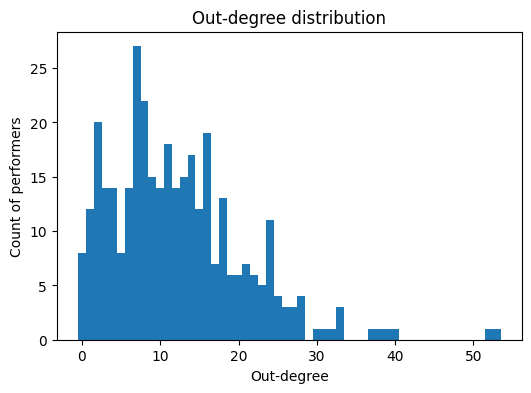

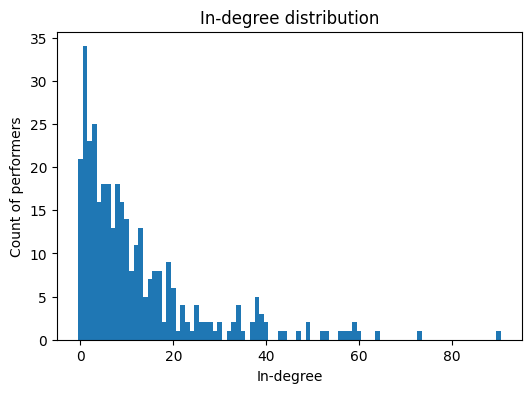

In [17]:
# Plot in and out-degree distributions (who links a lot?)
outdeg = [d for _, d in H.out_degree()]
indeg  = [d for _, d in H.in_degree()]

plt.figure(figsize=(6,4))
plt.hist(outdeg, bins=range(0, max(outdeg)+2), align="left")
plt.xlabel("Out-degree")
plt.ylabel("Count of performers")
plt.title("Out-degree distribution")
plt.show()

plt.figure(figsize=(6,4))
plt.hist(indeg, bins=range(0, max(indeg)+2), align="left")
plt.xlabel("In-degree")
plt.ylabel("Count of performers")
plt.title("In-degree distribution")
plt.show()

From the in-degree distribution we can see that most nodes have only a few incoming links/edges, while a few nodes have many incoming links/edges. We call these high degree nodes "hubs". The out-degree distribution are more evenly distributed, most between 1 and 15 links to other nodes (artists). 

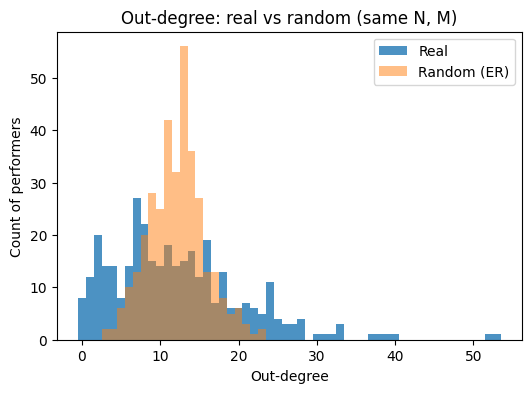

In [18]:
# Compare your out-degree to a random network (same N, M)
N = H.number_of_nodes()
M = H.number_of_edges()
p = M / (N * (N - 1))  # Erdős–Rényi density for a directed graph (no self-loops)

G_er = nx.gnp_random_graph(N, p, directed=True, seed=0)

# OUT-degree histograms: real vs random
real_out = [d for _, d in H.out_degree()]
er_out   = [d for _, d in G_er.out_degree()]

plt.figure(figsize=(6,4))
plt.hist(real_out, bins=range(0, max(real_out)+2), align="left", alpha=0.8, label="Real")
plt.hist(er_out,   bins=range(0, max(real_out)+2), align="left", alpha=0.5, label="Random (ER)")
plt.xlabel("Out-degree"); plt.ylabel("Count of performers")
plt.title("Out-degree: real vs random (same N, M)")
plt.legend(); plt.show()

When we compare the random graph to the out-degree distribution, we can see that the random graph is more centered and evenly distributed (normal distribution). Wheres the real world out-degree distribution is more skewed to the right.

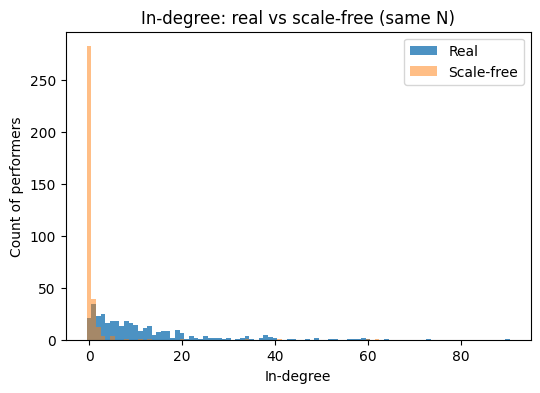

In [19]:
# Compare your in-degree to a scale-free network
# NetworkX's scale_free_graph returns a directed MultiDiGraph with heavy tails
G_sf_multi = nx.scale_free_graph(H.number_of_nodes(), seed=0)
# Simplify: remove self-loops and merge multi-edges
G_sf = nx.DiGraph((u, v) for u, v in G_sf_multi.edges() if u != v)

real_in = [d for _, d in H.in_degree()]
sf_in   = [d for _, d in G_sf.in_degree()]

plt.figure(figsize=(6,4))
plt.hist(real_in, bins=range(0, max(real_in)+2), align="left", alpha=0.8, label="Real")
plt.hist(sf_in,   bins=range(0, min(max(real_in), max(sf_in))+2), align="left", alpha=0.5, label="Scale-free")
plt.xlabel("In-degree"); plt.ylabel("Count of performers")
plt.title("In-degree: real vs scale-free (same N)")
plt.legend(); plt.show()

What we observe is that the in-degree distribution is heavy-tailed (few artists attract many links). That matches scale-free behavior (preferential attachment), unlike a random network. Out-degree is editor-limited; in-degree reflects popularity/centrality and can run away.

In [20]:
# Top 5 most connected perfomers
top_in  = sorted(H.in_degree,  key=lambda kv: kv[1], reverse=True)[:5]
top_out = sorted(H.out_degree, key=lambda kv: kv[1], reverse=True)[:5]
print("Top 5 in-degree :", top_in)
print("Top 5 out-degree:", top_out)

Top 5 in-degree : [('Led_Zeppelin', 90), ('Bob_Dylan', 73), ('Metallica', 64), ('David_Bowie', 60), ('U2', 59)]
Top 5 out-degree: [('Alice_in_Chains', 53), ('Deep_Purple', 52), ("Guns_N'_Roses", 40), ('Black_Sabbath', 39), ('Def_Leppard', 38)]


Above we have 5 most connected performers for the in-degree and out-degree. And it makes sense that the most referenced artists are those with significant influence. 

In [21]:
# 10 pages with longest entries (by n_words attribute)
top_10_longest_entries = sorted(H.nodes(data=True), key=lambda x: x[1]['text_len'], reverse=True)[:10]
for i in top_10_longest_entries:
    print("Top Longest Entries:", i[1])

Top Longest Entries: {'text_len': 370219, 'label': "Guns_N'_Roses"}
Top Longest Entries: {'text_len': 294819, 'label': 'Coldplay'}
Top Longest Entries: {'text_len': 269857, 'label': 'The_Rolling_Stones'}
Top Longest Entries: {'text_len': 265720, 'label': 'Chicago'}
Top Longest Entries: {'text_len': 265280, 'label': 'Paul_McCartney'}
Top Longest Entries: {'text_len': 264180, 'label': 'Bob_Dylan'}
Top Longest Entries: {'text_len': 263343, 'label': 'U2'}
Top Longest Entries: {'text_len': 261301, 'label': 'David_Bowie'}
Top Longest Entries: {'text_len': 256840, 'label': 'Elton_John'}
Top Longest Entries: {'text_len': 247387, 'label': 'Avril_Lavigne'}


**Section made by: Henrik & Ditte**

#### *Let's build a simple visualization of the network*

##### *For the sake of the visualisation, let's convert our network to undirected graph*

In [22]:
undirected_artist_graph = H.to_undirected()

##### *Use the NetworkX command nx.spring_layout or nx.draw_kamada_kawai to draw the resulting undirected network.*

*Set up your plot so that node-size depends on the node degree.*

*Make the node color depend on the length of content attribute. I recommend choosing a color scheme that is quite simple*

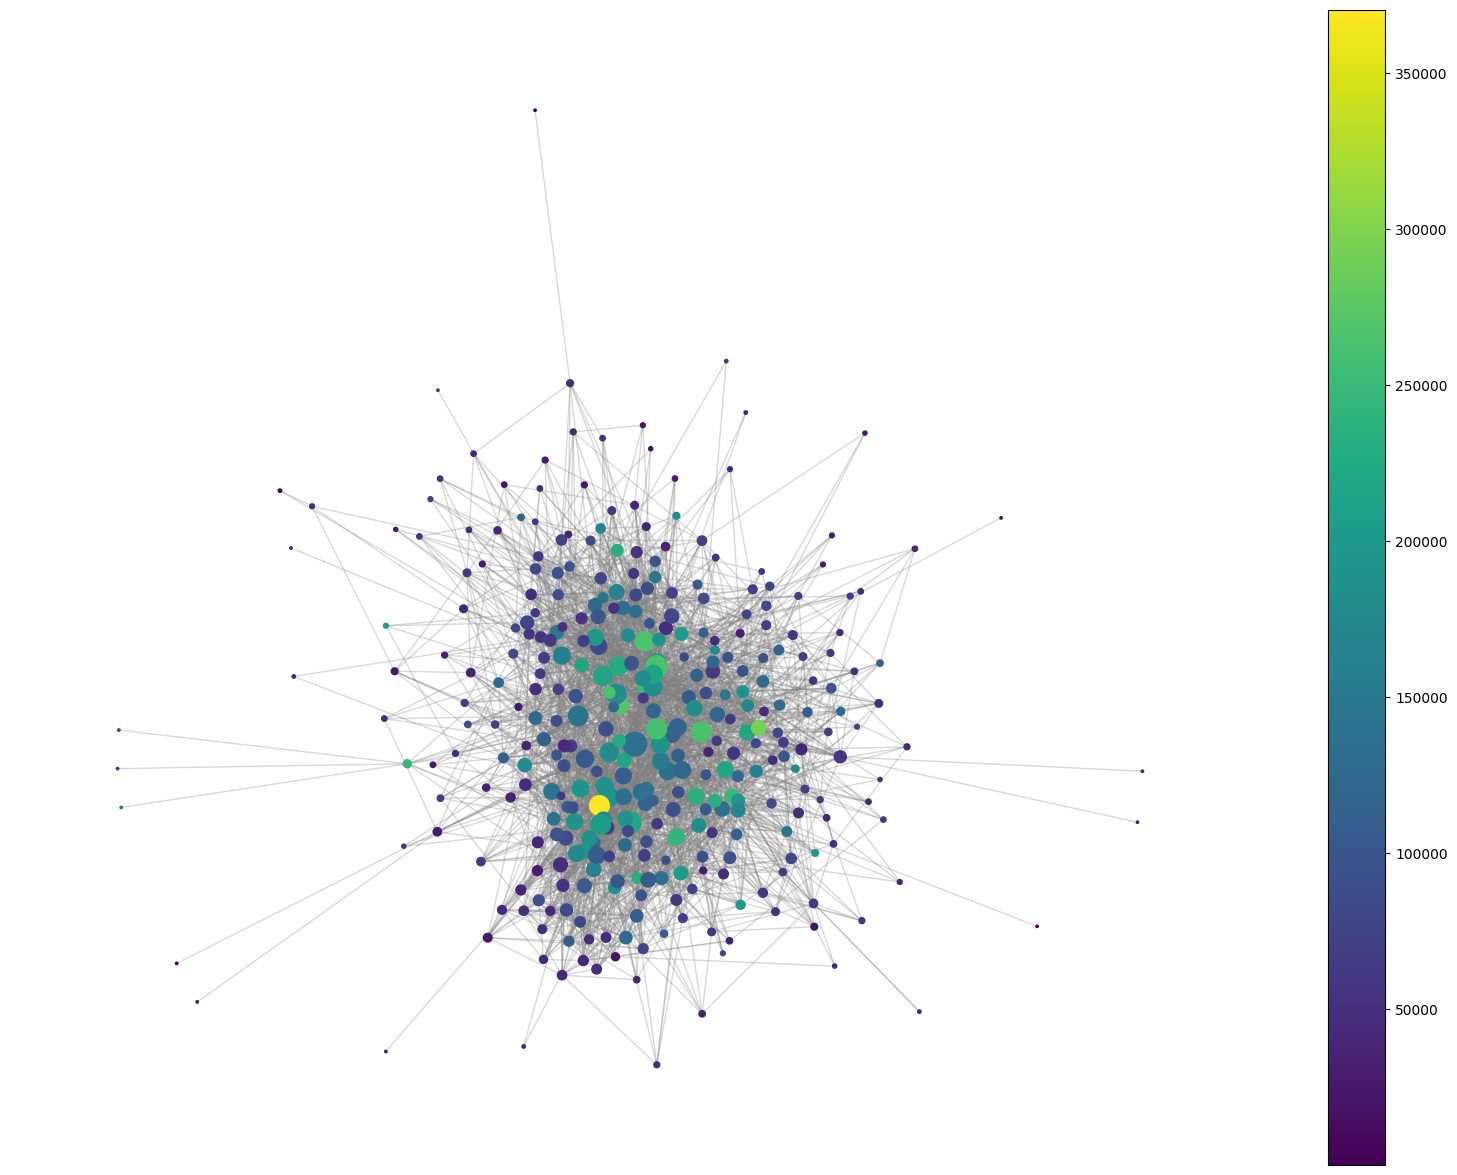

In [23]:
# compute layout
pos = nx.spring_layout(undirected_artist_graph)

# compute node sizes proportional to degree
degrees = dict(undirected_artist_graph.degree())
node_sizes = [degrees[n] * 3 for n in undirected_artist_graph.nodes()]  # scale by factor

text_lengths = nx.get_node_attributes(H, "text_len")
node_colors = [text_lengths.get(n, 0) for n in undirected_artist_graph.nodes()]


plt.figure(figsize=(20, 15))
nodes = nx.draw_networkx_nodes(
    undirected_artist_graph,
    pos,
    node_size=node_sizes,
    node_color=node_colors,
    cmap=plt.cm.viridis   # you can try "Reds", "Greens", "viridis", etc.
)
nx.draw_networkx_edges(
    undirected_artist_graph,
    pos,
    edge_color="gray",
    alpha=0.3
)

plt.colorbar(nodes)  # adds a color scale bar
plt.axis("off")
plt.show()

This visualization shows the undirected artist network using a spring layout. High-degree nodes are drawn toward the center, while low-degree nodes are pushed to the edges, creating a dense core surrounded by peripheral spokes. Node size reflects degree, so the largest nodes are the most connected artists. Node color represents article text length, with variation across the network. Brighter colors often appear near the core, suggesting that well-connected artists also tend to have longer articles, though this pattern should be confirmed by correlation analysis. Overall, the plot clearly illustrates hub formation, degree heterogeneity, and content variation in the network.

**Section made by: Andrei**